<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

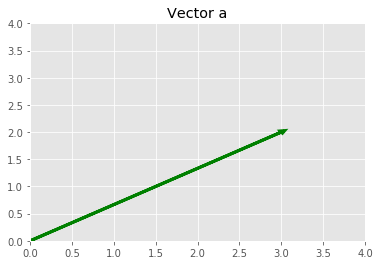

In [127]:
vector_a = np.array([3,2])

plt.xlim(0,4)          
plt.ylim(0,4)

plt.arrow(0,0,vector_a[0], vector_a[1], linewidth=3, head_width=.05, head_length=0.05, color='green')

plt.title("Vector a")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [128]:
# The norm of a vector represents it's magnitude
vector_b = [17,-4,-2,1]

print("||b|| =", np.linalg.norm(vector_b))

||b|| = 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [129]:
vector_c = [3,7,-2,12]
vector_d = [9,-7,4,6]

np.dot(vector_c, vector_d)

42

In [0]:
# The vectors are NOT orthogonal because their dot product does not equal to 0

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = [[7,4,2],
    [1,3,-1],
    [2,6,-4]]

In [132]:
# E inverse
np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [133]:
# E transpose
np.transpose(E)

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [134]:
import pandas as pd
import statistics as stats

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [135]:
# Describe returns to us the mean, std deviation, as well as 
# other useful statistics 
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [136]:
# Variance can be calculated using the stats library
print(f"customers variance = {stats.variance(customers)}")
print(f"snow variance = {stats.variance(snow)}")

customers variance = 98761.90476190476
snow variance = 8.571428571428571


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# No because they are of a widely different scale, we need to regularize them

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [138]:
varcovar_matrix = df.cov()
varcovar_matrix

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [139]:
# Not valid until we regularize and use a correlation coefficient table
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [140]:
# Let me get you some data to start you off.
data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [141]:
df.replace({"England": 1,"Wales": 2,"Scotland": 3,"North Ireland": 4},inplace=True)
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,1,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,2,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,3,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,4,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [143]:
scaler = StandardScaler()
scaler.fit(df)

scaled = pd.DataFrame(scaler.transform(df))
scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.341641,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,-0.447214,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.447214,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,1.341641,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [144]:
scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.341641,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.670820,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.000000,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.670820,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,1.341641,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [145]:
pca = PCA(2) # Num of resulting principle components
pca.fit(scaled)

projected = pca.transform(scaled)

pca_df = pd.DataFrame(pca.transform(scaled), columns=['PC 1', 'PC 2'])
pca_df

,PC 1,PC 2
0,-1.257360,0.388428
1,-4.486945,-1.788294
2,0.571202,3.211115
3,5.173102,-1.811249


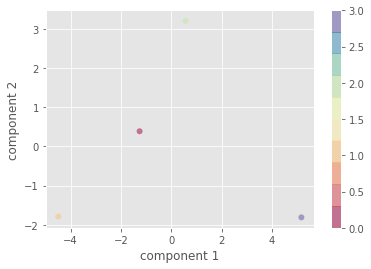

In [146]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=[0,1,2,3], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [147]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans

In [0]:
# Choosing appropriate k value (# of clusters)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

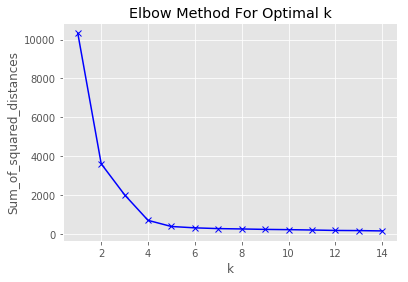

In [150]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [151]:
#train and fit a model with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [152]:
labels = kmeans.labels_
labels

array([3, 0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 1, 3, 1,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 3, 0, 1, 3, 3, 2, 1, 0, 0, 2, 2, 3, 1, 0, 3, 2, 1, 2,
       1, 2, 3, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 3, 3, 1,
       0, 1, 0, 3, 0, 0, 2, 2, 1, 2, 1, 0, 0, 3, 0, 3, 0, 1, 2, 3, 0, 3,
       0, 3, 2, 2, 0, 1, 3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 0, 0, 0, 3, 1,
       0, 2, 0, 1, 0, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 0, 3, 0, 2, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 3, 1, 3, 0, 2, 1, 1,
       0, 0], dtype=int32)

In [153]:
# Add a new column with the cluster labels
points['clusters'] = labels
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


In [0]:
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean(), df.x[df[column_header]==3].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean(), df.y[df[column_header]==3].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'pink'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

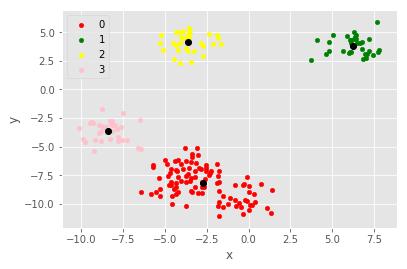

In [156]:
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)